In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
from scipy.optimize import curve_fit

import h5py
from IPython.utils import io


from joblib import Parallel, delayed
from tqdm import tqdm

In [2]:
%matplotlib widget

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [6]:
fname = r'/data/new_trap/20200809/Bead1/TransFunc/TransFunc_7_X_z-4e5_250s_1Hz.h5'
tf_x = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200809/Bead1/TransFunc/TransFunc_7_Y_z-4e5_250s_1Hz.h5'
tf_y = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200809/Bead1/TransFunc/TransFunc_7_Z_z-4e5_250s_1Hz.h5'
tf_z = BeadDataFile.BeadDataFile(fname)

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(*tf_x.psd2('x'))
ax[0].semilogy(*tf_y.psd2('y'))
ax[1].semilogy(*tf_z.psd2('z'))
ax[0].set(xlim=(0,200))
ax[1].set(xlim=(0,200))

No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[(0.0, 200.0)]

In [5]:
bdf_discharge = load_dir('/home/data_transfer/data_from_windows/20200806/Bead1/Discharge/')

182  files in folder
182  files loaded


In [6]:
scaleY = np.std(tf_y.response_at_freq('y', drive_freq=71))

NameError: name 'tf_y' is not defined

In [ ]:
resp_y = [np.std(bb.response_at_freq('y',71)) for bb in bdf_discharge]

In [ ]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(resp_y)), resp_y/scaleY)

In [13]:
gfw = GravityFramework.GravityFramework()
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  246458593.1819089
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  185840160.50690785
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  151541297.52397105
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  127098893.2578729
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  108738665.27352697
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  70056568.66589151
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  79502488.92800286
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  70078315.48128577
***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  66025844.001170814
***************

***************************************************
Z2-amplitude:  1.24e+02
reduced chi2:  3691.3834773341505
***************************************************
Z2-amplitude:  1.97e+02
reduced chi2:  8590.128425890605
***************************************************
Z2-amplitude:  2.27e+02
reduced chi2:  5173.218669228525
***************************************************
Z2-amplitude:  2.37e+02
reduced chi2:  3951.323166124945
***************************************************
Z2-amplitude:  2.69e+02
reduced chi2:  4670.398109903083
***************************************************
Z2-amplitude:  2.77e+02
reduced chi2:  7959.296085659526
***************************************************
Z2-amplitude:  4.31e+02
reduced chi2:  269620.886375561
***************************************************
Z2-amplitude:  2.97e+02
reduced chi2:  12724.520950441662
***************************************************
Z2-amplitude:  4.66e+03
reduced chi2:  3747048.5135871195
*****************

In [8]:
m2 = gfw.build_x_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10)

***************************************************
X2-amplitude:  1.28e+01
reduced chi2:  3.2153496248824225
***************************************************
X2-amplitude:  2.59e+01
reduced chi2:  18.577592377234602
***************************************************
X2-amplitude:  2.42e+01
reduced chi2:  15.645243459024933
***************************************************
X2-amplitude:  2.31e+01
reduced chi2:  20.221840830131878
***************************************************
X2-amplitude:  2.23e+01
reduced chi2:  19.167953701945226
***************************************************
X2-amplitude:  1.41e+01
reduced chi2:  6.5259772396936775
***************************************************
X2-amplitude:  1.08e+00
reduced chi2:  0.5005786544292209
***************************************************
X2-amplitude:  4.96e+00
reduced chi2:  1.3761516316954359
***************************************************
X2-amplitude:  4.72e+00
reduced chi2:  2.214736235601671
***********

***************************************************
X2-amplitude:  9.47e+00
reduced chi2:  0.31104905781696984
***************************************************
X2-amplitude:  9.88e+00
reduced chi2:  0.22305426738338438
***************************************************
X2-amplitude:  9.47e+00
reduced chi2:  0.4289565106964425
***************************************************
X2-amplitude:  9.37e+00
reduced chi2:  0.1772091282850258
***************************************************
X2-amplitude:  9.38e+00
reduced chi2:  0.20065914439226357
***************************************************
X2-amplitude:  9.36e+00
reduced chi2:  0.27521194861384907
***************************************************
X2-amplitude:  9.49e+00
reduced chi2:  0.1657238631577114
***************************************************
X2-amplitude:  1.04e+01
reduced chi2:  3.5758380026193612
***************************************************
X2-amplitude:  9.48e+00
reduced chi2:  0.24329427124059966
*****

In [15]:
phases = [m_.values[2] for m_ in m1]
amps = [m_.values[0] for m_ in m1]
amps2 = [m_.values[0] for m_ in m2]

<IPython.core.display.Javascript object>


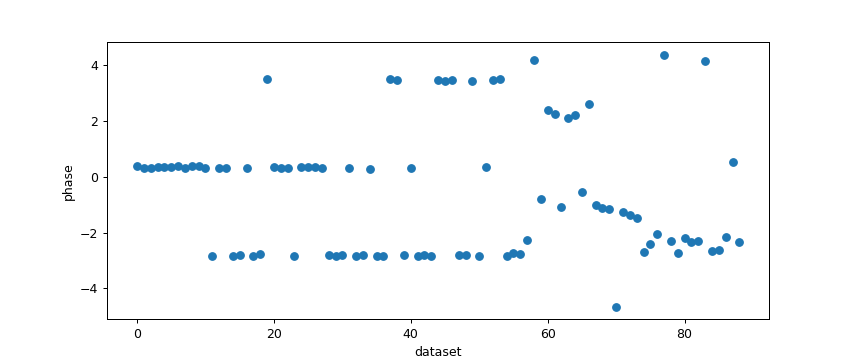

-0.5856775819161208


In [16]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(phases)), phases)
ax.set(xlabel='dataset', ylabel='phase')
print(np.mean(phases[20:100]))

No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data


<IPython.core.display.Javascript object>


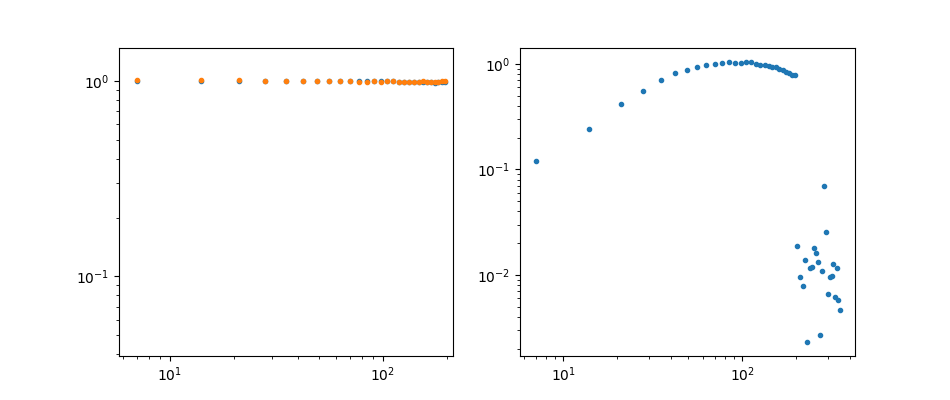

In [340]:
fname = r'/data/new_trap/20200730/Bead2/TransFunc/TransFunc_4_X_z-7e5_250s_1Hz.h5'
tf_x = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200730/Bead2/TransFunc/TransFunc_4_Y_z-7e5_250s_1Hz.h5'
tf_y = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200730/Bead2/TransFunc/TransFunc_4_Z_z-7e5_250s_1Hz.h5'
tf_z = BeadDataFile.BeadDataFile(fname)

gfw = GravityFramework.GravityFramework()
gfw.build_transfer_function([tf_x, tf_y, tf_z], base_freq=7, number_of_harmonics=50, scale_freq=71, plot=True)

<IPython.core.display.Javascript object>


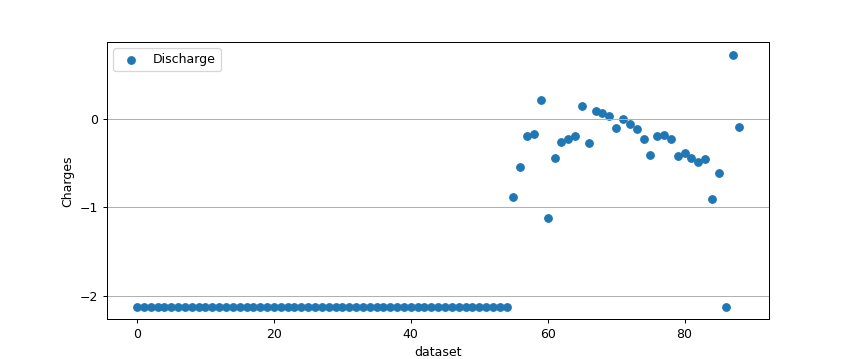

In [14]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 10.3
extra_scale2 = 100.3

ax.scatter(range(len(amps)), np.array(amps)/scale/extra_scale, label='Discharge')
# ax.scatter(range(len(amps2)), np.array(amps2)/scale/extra_scale2*1000, label='Discharge3 - bimodal')

ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(None,None), xlim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [311]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': 0, 'A2': 0.13, 'f2': drive_freq,
              'delta_phi': 0.0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': False,
              'fix_A2': False}
bandwidth=10
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [16]:
bandwidth= 2
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [30]:
def func1_scale(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/Discharge/Response/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -2.2, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1000, 1000], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}

    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_sin(xx2, fsamp=500, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

In [31]:
res_tmp = np.array(Parallel(n_jobs=10)(delayed(func1_scale)(i) for i in tqdm(range(100,400))))



  0%|          | 0/300 [00:00<?, ?it/s]

 20%|██        | 60/300 [00:00<00:00, 546.62it/s]

 47%|████▋     | 140/300 [00:00<00:00, 538.12it/s]

100%|██████████| 300/300 [00:00<00:00, 546.22it/s]

In [64]:
fname = r'/data/new_trap/20200730/Bead2/TransFunc/TransFunc_4_X_z-7e5_250s_1Hz.h5'
tf_x = BeadDataFile.BeadDataFile(fname)
fft_angles = np.angle(np.fft.rfft(tf_x.x2))
freq1 = np.fft.rfftfreq(len(tf_x.x2), d=1./5000)
print((fft_angles[freq1==71]+np.pi/2)%(2*np.pi)-2*np.pi)

No height data
No cantilever data
Error loading spinning data
No laser power data
[-0.64137206]


In [22]:
_,ax = plt.subplots()
ax.scatter(range(len(res_tmp)), res_tmp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
# scaleX = np.mean(mm_mle_scale/3)*-1
scaleX = np.mean(res_tmp/3)
print(scaleX)

6.677149577495942


In [407]:
bandwidth = 1

In [56]:
def func1(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
#     fname = r'/data/new_trap/20200730/Bead2/NeutralityOnY/71Hz20VNoSpin/Discharge_'+str(i)+'.h5'
    fname = r'/data/new_trap/20200720/Bead1/Millicharge/200V71Hz50kHzSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': phi_response, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1000, 1000], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}

    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_sin(xx2, fsamp=500, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

In [57]:
phis = np.arange(0,2*np.pi,0.2)
res_mean = []
res_std = []
for phi_ in phis:
    phi_response = phi_
    res_tmp = np.array(Parallel(n_jobs=10)(delayed(func1)(i) for i in tqdm(range(500))))
    res_mean.append(np.mean(res_tmp))
    res_std.append(np.std(res_tmp))



  0%|          | 0/500 [00:00<?, ?it/s]

 12%|█▏        | 60/500 [00:00<00:00, 514.28it/s]

 28%|██▊       | 140/500 [00:00<00:00, 504.58it/s]

 60%|██████    | 300/500 [00:00<00:00, 531.38it/s]

 76%|███████▌  | 380/500 [00:00<00:00, 509.45it/s]

 92%|█████████▏| 460/500 [00:00<00:00, 483.02it/s]

100%|██████████| 500/500 [00:00<00:00, 550.47it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 12%|█▏        | 60/500 [00:00<00:00, 526.79it/s]

 28%|██▊       | 140/500 [00:00<00:00, 541.96it/s]

 60%|██████    | 300/500 [00:00<00:00, 560.63it/s]

 76%|███████▌  | 380/500 [00:00<00:00, 539.48it/s]

 92%|█████████▏| 460/500 [00:00<00:00, 467.12it/s]

100%|██████████| 500/500 [00:00<00:00, 553.10it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 12%|█▏        | 60/500 [00:00<00:00, 527.98it/s]

 28%|██▊       | 140/500 [00:00<00:00, 538.75it/s]

 44%|████▍     | 220/500 [00:00<00:00, 594.55it/s]

 60%|██████    | 300/500 [00:00<00:00, 559.51it/s]

 76%|███████▌  | 380/500 [00:00<00:00, 522.27i

 76%|███████▌  | 380/500 [00:00<00:00, 509.20it/s]

 92%|█████████▏| 460/500 [00:00<00:00, 479.32it/s]

100%|██████████| 500/500 [00:00<00:00, 550.44it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 12%|█▏        | 60/500 [00:00<00:00, 517.92it/s]

 28%|██▊       | 140/500 [00:00<00:00, 503.45it/s]

 44%|████▍     | 220/500 [00:00<00:00, 549.17it/s]

 60%|██████    | 300/500 [00:00<00:00, 476.18it/s]

 76%|███████▌  | 380/500 [00:00<00:00, 445.05it/s]

 92%|█████████▏| 460/500 [00:01<00:00, 418.50it/s]

100%|██████████| 500/500 [00:01<00:00, 476.83it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 12%|█▏        | 60/500 [00:00<00:00, 473.13it/s]

 28%|██▊       | 140/500 [00:00<00:00, 473.06it/s]

 44%|████▍     | 220/500 [00:00<00:00, 538.70it/s]

 60%|██████    | 300/500 [00:00<00:00, 519.58it/s]

 76%|███████▌  | 380/500 [00:00<00:00, 453.75it/s]

 92%|█████████▏| 460/500 [00:00<00:00, 436.54it/s]

100%|██████████| 500/500 [00:00<00:00, 501.61it/s]

  0%|          | 0/500 [00:00<?, ?it

In [61]:
_,ax = plt.subplots()
ax.errorbar(phis, np.array(res_mean)/scaleX/20, yerr=np.array(res_std)/np.sqrt(500)/scaleX/20, fmt='o')
ax.plot(phis, phis*0, 'r--')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [52]:
_,ax = plt.subplots()
ax.hist(res_tmp/scaleX/20)
print(np.mean(res_tmp)/scaleX/20, np.std(res_tmp)/scaleX/20/np.sqrt(500))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.0015453700674310964 6.199625010896213e-05


### 71Hz, different spin

<IPython.core.display.Javascript object>


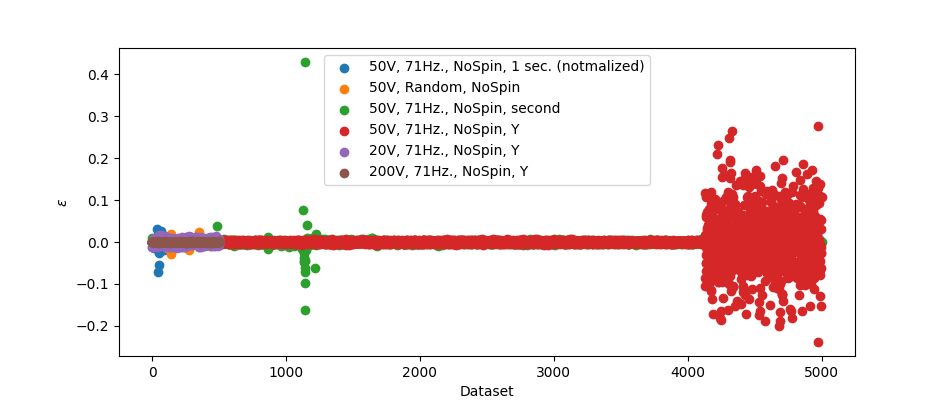

In [778]:
_, ax= plt.subplots(figsize=(9.5,4))
# ax.scatter(range(500), mm_200V71Hz11kHzSpin/20/scaleX, label='200V, 71Hz., 11kHzSpin')
# ax.scatter(range(500), mm_200V71Hz14kHzSpin/20/scaleX, label='200V, 71Hz., 14kHzSpin')
# ax.scatter(range(500), mm_200V71Hz24kHzSpin/20/scaleX, label='200V, 71Hz., 24kHzSpin')
# ax.scatter(range(500), mm_200V71Hz32kHzSpin/20/scaleX, label='200V, 71Hz., 32kHzSpin')
# ax.scatter(range(500), mm_200V71Hz40kHzSpin/20/scaleX, label='200V, 71Hz., 40kHzSpin')
# ax.scatter(range(500), mm_200V71Hz50kHzSpin/20/scaleX, label='200V, 71Hz., 50kHzSpin')
# ax.scatter(range(2000), mm_50V71Hz50kHzSpin[2000:]/5/scaleX, label='200V, 71Hz., 50V 50kHzSpin')
# ax.scatter(range(3500), mm_Random200V50kHzSpin/5/scaleX, label='200V, Random., 50kHzSpin')
# ax.scatter(range(2000), mm_71Hz200VNoSpin/20/scaleX, label='200V, 71Hz., NoSpin')
# ax.scatter(range(5500), mm_71Hz50VNoSpin/5/scaleX, label='50V, 71Hz., NoSpin')
# ax.scatter(range(500), mm_71Hz20VNoSpin/2/scaleX, label='20V, 71Hz., NoSpin')
ax.scatter(range(500), mm_71Hz50VNoSpin_1sec/5/scaleX10/np.sqrt(10), label='50V, 71Hz., NoSpin, 1 sec. (notmalized)')
ax.scatter(range(500), mm_Random50VNoSpin/5/scaleX, label='50V, Random, NoSpin')
ax.scatter(range(len(mm_71Hz50VNoSpin2)), mm_71Hz50VNoSpin2/5/scaleX, label='50V, 71Hz., NoSpin, second')
# ax.scatter(range(len(mm_71Hz50VNoSpin2)), mm_71Hz50VNoSpin2_out/5/scaleX, label='50V, 71Hz., NoSpin, second')

ax.scatter(range(len(mm_71Hz50VNoSpin_Y)), mm_71Hz50VNoSpin_Y/5/scaleX, label='50V, 71Hz., NoSpin, Y')
ax.scatter(range(len(mm_71Hz20VNoSpin_Y)), mm_71Hz20VNoSpin_Y/2/scaleX, label='20V, 71Hz., NoSpin, Y')
ax.scatter(range(len(mm_71Hz200VNoSpin_Y)), mm_71Hz200VNoSpin_Y/20/scaleX, label='200V, 71Hz., NoSpin, Y')
ax.set(xlabel='Dataset', ylabel=r'$\epsilon$')
ax.legend()

In [524]:
data = mm_Random50VNoSpin
data = list(mm_71Hz50VNoSpin2)+list(mm_71Hz50VNoSpin)
tmpp = [mmm for mmm in np.array(data)/5/scaleX if (mmm<0.01)&(mmm>-0.01)]
print(np.mean(tmpp), np.std(tmpp)/np.sqrt(len(tmpp)))

-0.00015741325560884788 2.3434906504810177e-05


In [555]:
data = mm_71Hz50VNoSpin
tmpp = [mmm for mmm in np.array(data)/5/scaleX if (mmm<0.01)&(mmm>-0.01)]

data = mm_71Hz50VNoSpin2
tmpp23 = [mmm/5/scaleX for mmm,mm_out in zip(np.array(data), mm_71Hz50VNoSpin2_out) if (mmm<0.4)&(mmm>-0.4)&(mm_out>-0.4)&(mm_out>-0.4)]

In [557]:
print(np.mean(tmpp23), np.std(tmpp23)/np.sqrt(len(tmpp23))), print(np.mean(mm_71Hz50VNoSpin2/5/scaleX ), np.std(mm_71Hz50VNoSpin2)/5/scaleX/np.sqrt(len(mm_71Hz50VNoSpin2)))

-0.00038541551370175297 3.102020196845412e-05
-0.0004340373371383688 0.00010621378734496777


(None, None)

In [547]:
mm_71Hz50VNoSpin2_out = mm_71Hz50VNoSpin2

<IPython.core.display.Javascript object>


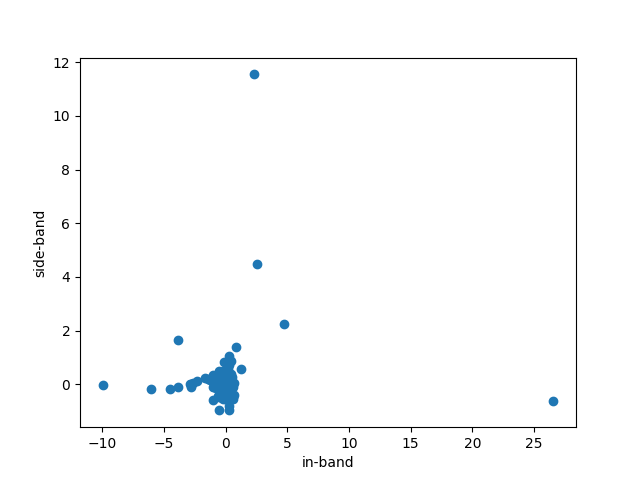

[Text(0, 0.5, 'side-band'), Text(0.5, 0, 'in-band')]

In [553]:
_,ax = plt.subplots()
ax.scatter(mm_71Hz50VNoSpin2, mm_71Hz50VNoSpin2_out)
ax.set(xlabel='in-band', ylabel='side-band')

In [795]:
means = [np.mean(tmpp[j*100:(j+1)*100]) for j in range(54)]
stds = [np.std(tmpp[j*100:(j+1)*100]) for j in range(54)]

means2 = [np.mean(tmpp2[j*100:(j+1)*100]) for j in range(49)]
stds2 = [np.std(tmpp2[j*100:(j+1)*100]) for j in range(49)]

means3 = [np.mean(mm_71Hz50VNoSpin_Y[j*100:(j+1)*100]/5/scaleX) for j in range(40)]
stds3 = [np.std(mm_71Hz50VNoSpin_Y[j*100:(j+1)*100]/5/scaleX) for j in range(40)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


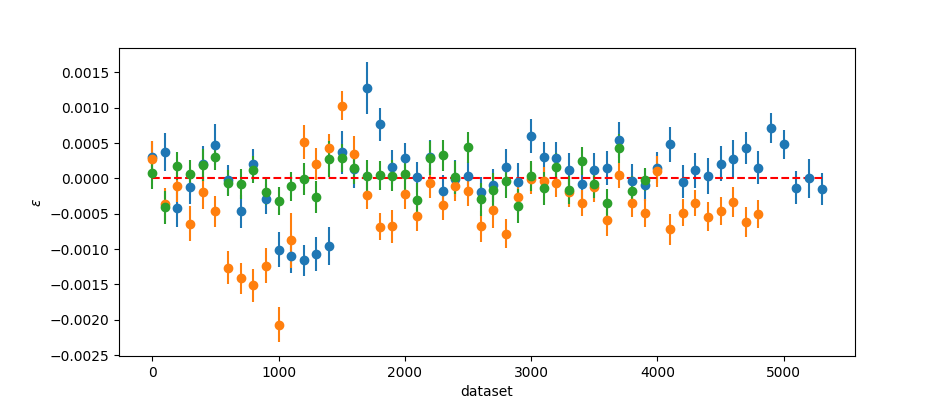

[Text(0, 0.5, '$\\epsilon$'), Text(0.5, 0, 'dataset')]

In [798]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,5400,100), means, yerr=stds/np.sqrt(100),fmt='o')
ax.errorbar(np.arange(0,4900,100), means2, yerr=stds2/np.sqrt(100),fmt='o')
ax.errorbar(np.arange(0,4000,100), means3, yerr=stds3/np.sqrt(100),fmt='o')
ax.plot(np.arange(0,5400,100), np.arange(0,5400,100)*0, 'r--')
ax.set(xlabel='dataset', ylabel=r'$\epsilon$')

<IPython.core.display.Javascript object>


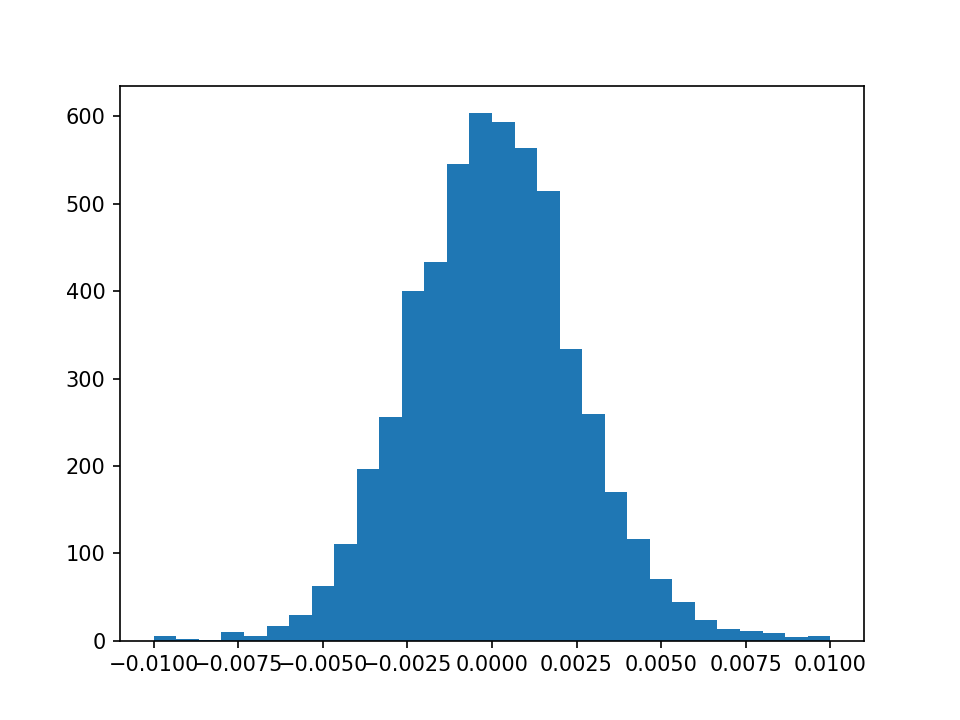

In [486]:
_,ax = plt.subplots()
_ = ax.hist(mm_71Hz50VNoSpin/5/scaleX, bins=30, range=(-0.01,0.01))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


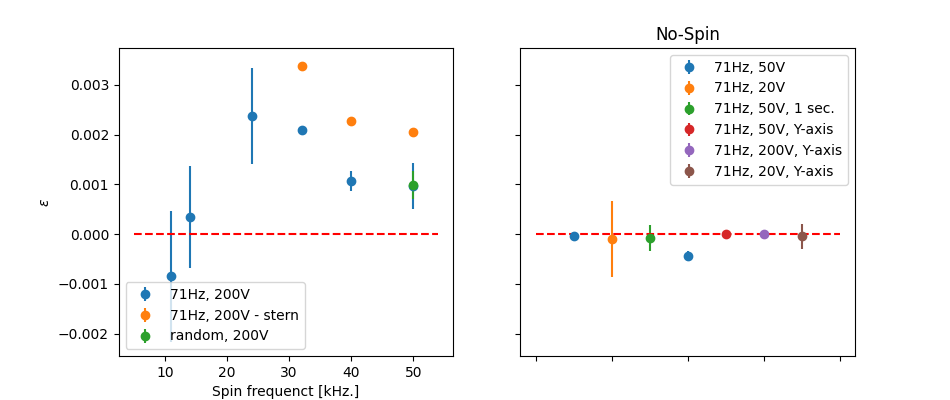

[Text(0.5, 1.0, 'No-Spin')]

In [785]:
means = [np.mean(mm_200V71Hz11kHzSpin/20/scaleX), np.mean(mm_200V71Hz14kHzSpin/20/scaleX), 
         np.mean(mm_200V71Hz24kHzSpin/20/scaleX), np.mean(mm_200V71Hz32kHzSpin/20/scaleX), 
         np.mean(mm_200V71Hz40kHzSpin/20/scaleX), np.mean(mm_200V71Hz50kHzSpin/20/scaleX)]
stds = [np.std(mm_200V71Hz11kHzSpin/20/scaleX)/np.sqrt(500), np.std(mm_200V71Hz14kHzSpin/20/scaleX)/np.sqrt(500)
        ,np.std(mm_200V71Hz24kHzSpin/20/scaleX)/np.sqrt(500), np.std(mm_200V71Hz32kHzSpin/20/scaleX)/np.sqrt(500)
       ,np.std(mm_200V71Hz40kHzSpin/20/scaleX)/np.sqrt(500),np.std(mm_200V71Hz50kHzSpin/20/scaleX)/np.sqrt(500)]
spin_freqs = [11, 14, 24, 32, 40, 50]

means2 = [np.mean(mm_50V71Hz50kHzSpin[2000:]/5/scaleX)]
stds2 = [np.std(mm_50V71Hz50kHzSpin[2000:]/5/scaleX)/np.sqrt(2000)]
spin_freqs2 = [50]

means22 = [np.mean(mm_200V71Hz32kHzSpin_stern/20/5.08), np.mean(mm_200V71Hz40kHzSpin_stern/20/5.08), np.mean(mm_200V71Hz50kHzSpin_stern/20/5.08)]
stds22 = [np.std(mm_200V71Hz32kHzSpin_stern/20/5.08)/np.sqrt(500),np.std(mm_200V71Hz32kHzSpin_stern/20/5.08)/np.sqrt(500),np.std(mm_200V71Hz32kHzSpin_stern/20/5.08)/np.sqrt(500)]
spin_freqs22 = [32, 40, 50]

spin_freqs = [11, 14, 24, 32, 40, 50]

means3 = [np.mean(mm_Random200V50kHzSpin/20/scaleX)]
stds3 = [np.std(mm_Random200V50kHzSpin/20/scaleX)/np.sqrt(3500)]
spin_freqs3 = [50]


means4 = [np.mean(mm_71Hz200VNoSpin/20/scaleX)]
stds4 = [np.std(mm_71Hz200VNoSpin/20/scaleX)/np.sqrt(2000)]
spin_freqs4 = [27]

means5 = [np.mean(mm_71Hz50VNoSpin/5/scaleX), np.mean(mm_71Hz50VNoSpin2/5/scaleX)]
stds5 = [np.std(mm_71Hz50VNoSpin/5/scaleX)/np.sqrt(5500), np.std(mm_71Hz50VNoSpin2/5/scaleX)/np.sqrt(5000)]
spin_freqs5 = [1, 4]

means6 = [np.mean(mm_71Hz50VNoSpin/2/scaleX)]
stds6 = [np.std(mm_71Hz50VNoSpin/2/scaleX)/np.sqrt(500)]
spin_freqs6 = [2]

means7 = [np.mean(mm_71Hz50VNoSpin_1sec/5/scaleX10)]
stds7 = [np.std(mm_71Hz50VNoSpin_1sec/5/scaleX10)/np.sqrt(500)]
spin_freqs7 = [3]

means8 = [np.mean(mm_Random50VNoSpin/5/scaleX10)]
stds8 = [np.std(mm_Random50VNoSpin/5/scaleX10)/np.sqrt(500)]
spin_freqs8 = [4]

means9 = [np.mean(mm_71Hz50VNoSpin_Y[:4000]/5/scaleX)]
stds9 = [np.std(mm_71Hz50VNoSpin_Y[:4000]/5/scaleX)/np.sqrt(4000)]
spin_freqs9 = [5]

means10 = [np.mean(mm_71Hz200VNoSpin_Y/20/scaleX)]
stds10 = [np.std(mm_71Hz200VNoSpin_Y/20/scaleX)/np.sqrt(500)]
spin_freqs10 = [6]

means11 = [np.mean(mm_71Hz20VNoSpin_Y/2/scaleX)]
stds11 = [np.std(mm_71Hz20VNoSpin_Y/2/scaleX)/np.sqrt(500)]
spin_freqs11 = [7]

_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True)
ax[0].errorbar(spin_freqs, means, yerr=stds, fmt='o', label='71Hz, 200V')
ax[0].errorbar(spin_freqs22, means22, yerr=stds22, fmt='o', label='71Hz, 200V - stern')
ax[0].errorbar(spin_freqs3, means3, yerr=stds3, fmt='o', label='random, 200V')
# ax[0].errorbar(spin_freqs4, means4, yerr=stds4, fmt='o', label='71Hz, no spin')
ax[0].plot(np.arange(5,55),np.arange(5,55)*0, 'r--')

ax[1].errorbar(spin_freqs5, means5, yerr=stds5, fmt='o', label='71Hz, 50V')
ax[1].errorbar(spin_freqs6, means6, yerr=stds6, fmt='o', label='71Hz, 20V')
ax[1].errorbar(spin_freqs7, means7/np.sqrt(10), yerr=stds7/np.sqrt(10), fmt='o', label='71Hz, 50V, 1 sec.')
# ax[1].errorbar(spin_freqs8, means8, yerr=stds8, fmt='o', label='Random, 50V, no spin')
ax[1].errorbar(spin_freqs9, means9, yerr=stds9, fmt='o', label='71Hz, 50V, Y-axis')
ax[1].errorbar(spin_freqs10, means10, yerr=stds10, fmt='o', label='71Hz, 200V, Y-axis')
ax[1].errorbar(spin_freqs11, means11, yerr=stds11, fmt='o', label='71Hz, 20V, Y-axis')
ax[1].plot(np.arange(0,9),np.arange(0,9)*0, 'r--')

ax[0].set(xlabel='Spin frequenct [kHz.]', ylabel=r'$\epsilon$')
[a.legend() for a in ax]
ax[1].xaxis.set_ticklabels([])
ax[1].set(title='No-Spin')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


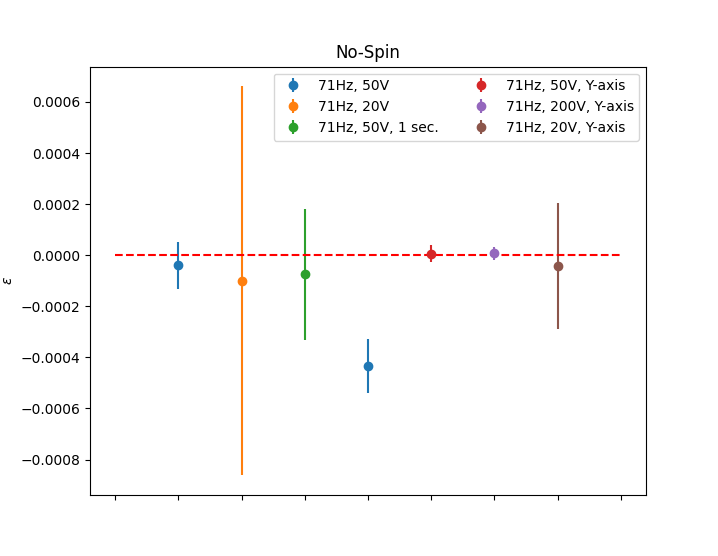

[5.83250341e-05]


In [784]:
_,ax = plt.subplots()
ax.errorbar(spin_freqs5, means5, yerr=stds5, fmt='o', label='71Hz, 50V')
ax.errorbar(spin_freqs6, means6, yerr=stds6, fmt='o', label='71Hz, 20V')
ax.errorbar(spin_freqs7, means7/np.sqrt(10), yerr=stds7/np.sqrt(10), fmt='o', label='71Hz, 50V, 1 sec.')
ax.errorbar(spin_freqs9, means9, yerr=stds9, fmt='o', label='71Hz, 50V, Y-axis')
ax.errorbar(spin_freqs10, means10, yerr=stds10, fmt='o', label='71Hz, 200V, Y-axis')
ax.errorbar(spin_freqs11, means11, yerr=stds11, fmt='o', label='71Hz, 20V, Y-axis')
ax.plot(np.arange(0,9),np.arange(0,9)*0, 'r--')

ax.set(ylabel=r'$\epsilon$', title='No-Spin')
ax.legend(ncol=2)
ax.xaxis.set_ticklabels([])
print(2*stds10[0]+means10)

### Look at the spin

In [109]:
a,b = bb.welch_psd('spin',res=5000)
cutoff = int(1000/10)
a[np.argmax(b[cutoff:])+cutoff]

10920.0

In [763]:
def funcS(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/NeutralityOnY/71Hz200VNoSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    b, a = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 20000)
    cutoff = int(500/10)
    return (a[np.argmax(b[cutoff:700])+cutoff])
    

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    observed_nospin3_Y = np.array(pool.map(funcS, range(500)))
    pool.close()

0   ******************
16   ******************
4   ******************
20   ******************
24   ******************
36   ******************
44   ******************
32   ******************
40   ******************
8   ******************
12   ******************
60   ******************
48   ******************
84   ******************
80   ******************
120   ******************
108   ******************
28   ******************
76   ******************
52   ******************
104   ******************
92   ******************
56   ******************
100   ******************
128   ******************
72   ******************
96   ******************
116   ******************
64   ******************
68   ******************
88   ******************
112   ******************
124   ******************
156   ******************
136   ******************
132   ******************
152   ******************
148   ******************
144   ******************
140   ******************
85   ******************
1   

388   ******************
392   ******************
396   ******************
299   ******************
283   ******************
400   ******************
404   ******************
408   ******************
412   ******************
397   ******************
416   ******************
393   ******************
405   ******************
389   ******************
420   ******************
401   ******************
295   ******************
409   ******************
365   ******************
321   ******************
394   ******************
319   ******************
349   ******************
373   ******************
337   ******************
421   ******************
424   ******************
413   ******************
428   ******************
341   ******************
279   ******************
333   ******************
311   ******************
330   ******************
271   ******************
327   ******************
410   ******************
357   ******************
417   ******************
432   ******************


In [658]:
spins = []
for i in range(0,5500,100):
    fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    aa, bb = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 200000)
    spins.append(np.mean(aa[(bb>60)*(bb<82)])*1e10)

<IPython.core.display.Javascript object>


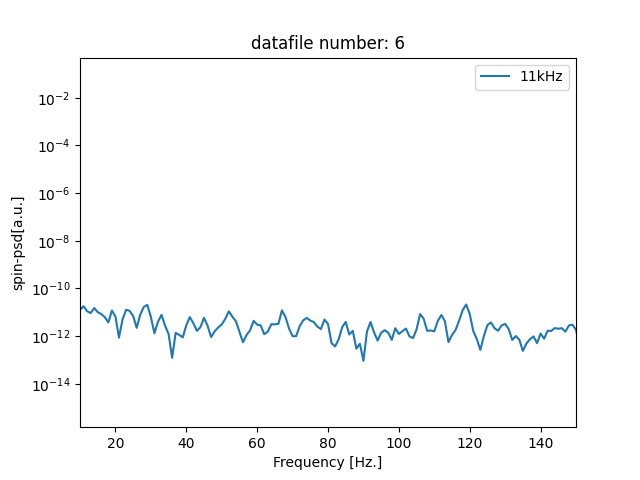

0.034176179007028545


In [656]:
datafile_num = 6
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V11kHzSpin/Discharge_'+str(datafile_num)+'.h5'
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V14.2kHzSpin/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Ha200V24kHzSpin/Discharge_'+str(datafile_num)+'.h5'
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V32kHzSpin/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V40kHzSpin/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V50kHzSpin/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50V50kHzSpin/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Neutrality/Random200V50kHzSpin/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200VNoSpin/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin2/Discharge_'+str(datafile_num)+'.h5'
fname = r'/data/new_trap/20200730/Bead2/Discharge/ForceCalibration/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/NeutralityOnY/71Hz200VNoSpin/Discharge_'+str(datafile_num)+'.h5'

bb = BeadDataFile.BeadDataFile(fname=fname)
_,ax = plt.subplots()
aa, bb = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 200000)
ax.semilogy(bb, aa, label='11kHz')
ax.legend()
ax.set(xlim=(10,150), xlabel='Frequency [Hz.]', ylabel='spin-psd[a.u.]', title='datafile number: '+str(datafile_num))
print(np.mean(aa[(bb>60)*(bb<82)])*1e10)

<IPython.core.display.Javascript object>


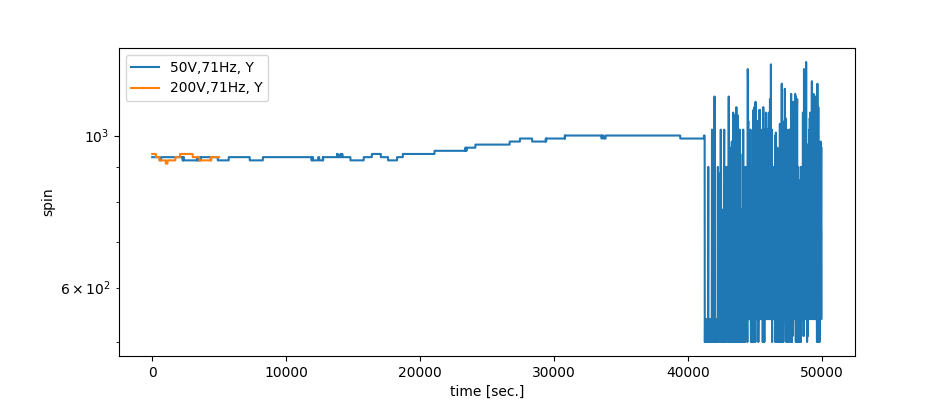

In [766]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax.scatter(range(len(observed_spin1)), observed_spin1, label='11kHz')
# ax.scatter(range(len(observed_spin2)), observed_spin2, label='14kHz')
# ax.scatter(range(len(observed_spin3)), observed_spin3, label='24kHz')
# ax.scatter(range(len(observed_spin4)), observed_spin4, label='32kHz')
# ax.scatter(range(len(observed_spin5)), observed_spin5, label='40kHz')
# ax.scatter(range(len(observed_spin6)), observed_spin6, label='50kHz')
# ax.plot(np.arange(5000)*10, observed_nospin1, label='50V,71Hz, X')
# ax.plot(np.arange(5000)*10, observed_nospin2, label='50V,71Hz, X, second dataset')
ax.semilogy(np.arange(5000)*10, observed_nospin2_Y, label='50V,71Hz, Y')
ax.semilogy(np.arange(500)*10, observed_nospin3_Y, label='200V,71Hz, Y')
ax.set(xlabel='time [sec.]', ylabel='spin')
ax.legend()

<IPython.core.display.Javascript object>


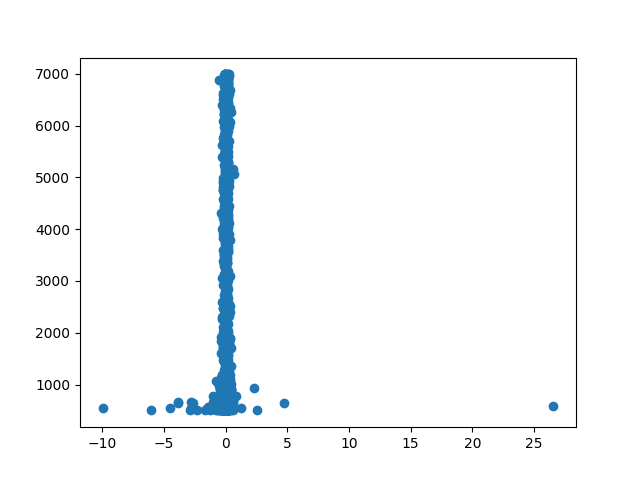

(224, 0.0007317181043042005, 0.00015484500262068633)

In [745]:
_,ax = plt.subplots()
ax.scatter(mm_71Hz50VNoSpin2, observed_nospin2)
ttt = np.array([mm for mm,mm2 in zip(mm_71Hz50VNoSpin2, observed_nospin2) if mm2>5000])
len(ttt), np.mean(ttt/5/scaleX), np.std(ttt/5/scaleX)/np.sqrt(len(ttt))

In [68]:
def func2(i, lasti):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz200V32kHzSpin/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
#     freqs.append(drive_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.056, 'A2': 0.13, 'f2': drive_freq,
                  'delta_phi': 0.07,
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
                  'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
                  'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
                  'fix_A2': True}

    frequency = fit_kwargs['f']
    
    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[20000:1*lasti:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) / 6
    xx3 = xx3[20000:1*lasti:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_gg3 = np.array(pool.starmap(func2, ss3))
    pool.close()

89   ******************
0   ******************
26   ******************
78   ******************
15   ******************
63   ******************
30   ******************
52   ******************
93   ******************
67   ******************
56   ******************
41   ******************
19   ******************
4   ******************
82   ******************
8   ******************
97   ******************
71   ******************
34   ******************
45   ******************
23   ******************
86   ******************
38   ******************
75   ******************
12   ******************
49   ******************
60   ******************
90   ******************
1   ******************
16   ******************
64   ******************
27   ******************
53   ******************
94   ******************
31   ******************
5   ******************
57   ******************
79   ******************
68   ******************
42   ******************
91   ******************
35   ****************

60   ******************
61   ******************
0   ******************
1   ******************
1   ******************
70   ******************
1   ******************
42   ******************
78   ******************
78   ******************
0   ******************
1   ******************
69   ******************
15   ******************
40   ******************
62   ******************
0   ******************
61   ******************
41   ******************
59   ******************
43   ******************
21   ******************
71   ******************
79   ******************
1   ******************
49   ******************
79   ******************
8   ******************
21   ******************
2   ******************
49   ******************
8   ******************
8   ******************
41   ******************
60   ******************
62   ******************
70   ******************
16   ******************
44   ******************
2   ******************
26   ******************
42   ******************
80   

51   ******************
76   ******************
49   ******************
29   ******************
29   ******************
43   ******************
31   ******************
28   ******************
58   ******************
12   ******************
60   ******************
57   ******************
65   ******************
17   ******************
72   ******************
85   ******************
30   ******************
50   ******************
7   ******************
11   ******************
9   ******************
10   ******************
91   ******************
32   ******************
39   ******************
19   ******************
18   ******************
6   ******************
88   ******************
66   ******************
29   ******************
69   ******************
86   ******************
30   ******************
18   ******************
13   ******************
61   ******************
77   ******************
4   ******************
92   ******************
52   ******************
74   ***************

83   ******************
75   ******************
84   ******************
35   ******************
28   ******************
3   ******************
47   ******************
90   ******************
59   ******************
98   ******************
11   ******************
16   ******************
25   ******************
96   ******************
19   ******************
87   ******************
77   ******************
84   ******************
37   ******************
38   ******************
65   ******************
85   ******************
35   ******************
57   ******************
88   ******************
29   ******************
18   ******************
69   ******************
85   ******************
76   ******************
21   ******************
60   ******************
11   ******************
70   ******************
4   ******************
99   ******************
39   ******************
49   ******************
97   ******************
77   ******************
26   ******************
60   *************

26   ******************
9   ******************
47   ******************
86   ******************
94   ******************
68   ******************
53   ******************
23   ******************
35   ******************
46   ******************
18   ******************
25   ******************
15   ******************
51   ******************
45   ******************
95   ******************
68   ******************
27   ******************
25   ******************
31   ******************
67   ******************
86   ******************
94   ******************
26   ******************
10   ******************
73   ******************
95   ******************
95   ******************
57   ******************
26   ******************
54   ******************
76   ******************
63   ******************
42   ******************
49   ******************
47   ******************
69   ******************
36   ******************
69   ******************
97   ******************
48   ******************
46   ************

5   ******************
33   ******************
47   ******************
93   ******************
21   ******************
1   ******************
65   ******************
56   ******************
9   ******************
41   ******************
78   ******************
73   ******************
86   ******************
55   ******************
91   ******************
79   ******************
32   ******************
58   ******************
99   ******************
29   ******************
45   ******************
80   ******************
68   ******************
6   ******************
37   ******************
6   ******************
40   ******************
21   ******************
75   ******************
42   ******************
80   ******************
59   ******************
2   ******************
34   ******************
5   ******************
33   ******************
10   ******************
0   ******************
69   ******************
58   ******************
80   ******************
24   ******************


69   ******************
16   ******************
82   ******************
21   ******************
26   ******************
47   ******************
92   ******************
57   ******************
37   ******************
55   ******************
86   ******************
15   ******************
73   ******************
46   ******************
87   ******************
30   ******************
64   ******************
86   ******************
54   ******************
43   ******************
10   ******************
38   ******************
17   ******************
95   ******************
75   ******************
10   ******************
65   ******************
58   ******************
98   ******************
42   ******************
16   ******************
98   ******************
48   ******************
27   ******************
87   ******************
47   ******************
89   ******************
65   ******************
88   ******************
38   ******************
11   ******************
44   ***********

17   ******************
80   ******************
90   ******************
70   ******************
65   ******************
70   ******************
61   ******************
75   ******************
54   ******************
43   ******************
7   ******************
30   ******************
93   ******************
37   ******************
65   ******************
2   ******************
8   ******************
17   ******************
48   ******************
49   ******************
52   ******************
91   ******************
84   ******************
97   ******************
81   ******************
97   ******************
55   ******************
31   ******************
71   ******************
99   ******************
49   ******************
66   ******************
62   ******************
94   ******************
49   ******************
54   ******************
38   ******************
50   ******************
44   ******************
28   ******************
76   ******************
23   **************

71   ******************
44   ******************
91   ******************
14   ******************
14   ******************
7   ******************
10   ******************
41   ******************
95   ******************
45   ******************
34   ******************
61   ******************
59   ******************
96   ******************
20   ******************
76   ******************
38   ******************
58   ******************
10   ******************
28   ******************
45   ******************
93   ******************
21   ******************
37   ******************
72   ******************
54   ******************
21   ******************
11   ******************
27   ******************
92   ******************
72   ******************
8   ******************
96   ******************
35   ******************
62   ******************
18   ******************
28   ******************
76   ******************
97   ******************
84   ******************
15   ******************
73   *************

51   ******************
68   ******************
18   ******************
66   ******************
72   ******************
23   ******************
30   ******************
66   ******************
60   ******************
83   ******************
3   ******************
87   ******************
30   ******************
47   ******************
20   ******************
44   ******************
56   ******************
89   ******************
5   ******************
80   ******************
97   ******************
7   ******************
19   ******************
65   ******************
64   ******************
15   ******************
67   ******************
36   ******************
55   ******************
46   ******************
52   ******************
24   ******************
84   ******************
61   ******************
67   ******************
42   ******************
6   ******************
80   ******************
31   ******************
51   ******************
48   ******************
8   ****************

75   ******************
22   ******************
81   ******************
77   ******************
14   ******************
94   ******************
57   ******************
49   ******************
60   ******************
34   ******************
13   ******************
58   ******************
41   ******************
89   ******************
77   ******************
66   ******************
38   ******************
89   ******************
41   ******************
23   ******************
76   ******************
41   ******************
12   ******************
82   ******************
15   ******************
61   ******************
29   ******************
5   ******************
42   ******************
72   ******************
78   ******************
14   ******************
42   ******************
95   ******************
24   ******************
67   ******************
35   ******************
95   ******************
69   ******************
29   ******************
96   ******************
23   ************

1   ******************
21   ******************
86   ******************
9   ******************
49   ******************
86   ******************
5   ******************
27   ******************
86   ******************
78   ******************
58   ******************
58   ******************
42   ******************
74   ******************
81   ******************
46   ******************
70   ******************
72   ******************
79   ******************
74   ******************
24   ******************
92   ******************
92   ******************
84   ******************
27   ******************
55   ******************
31   ******************
38   ******************
59   ******************
87   ******************
2   ******************
6   ******************
47   ******************
10   ******************
82   ******************
25   ******************
43   ******************
56   ******************
28   ******************
75   ******************
35   ******************
87   ****************

33   ******************
76   ******************
1   ******************
68   ******************
35   ******************
31   ******************
24   ******************
44   ******************
91   ******************
96   ******************
61   ******************
28   ******************
12   ******************
59   ******************
54   ******************
70   ******************
55   ******************
41   ******************
96   ******************
13   ******************
36   ******************
69   ******************
0   ******************
33   ******************
95   ******************
34   ******************
83   ******************
92   ******************
94   ******************
32   ******************
97   ******************
84   ******************
2   ******************
13   ******************
92   ******************
16   ******************
25   ******************
62   ******************
81   ******************
60   ******************
45   ******************
56   **************

57   ******************
40   ******************
24   ******************
76   ******************
13   ******************
28   ******************
73   ******************
90   ******************
81   ******************
1   ******************
89   ******************
78   ******************
94   ******************
73   ******************
12   ******************
58   ******************
33   ******************
6   ******************
87   ******************
46   ******************
11   ******************
24   ******************
55   ******************
25   ******************
77   ******************
14   ******************
47   ******************
74   ******************
62   ******************
56   ******************
47   ******************
41   ******************
59   ******************
82   ******************
3   ******************
0   ******************
3   ******************
7   ******************
21   ******************
90   ******************
93   ******************
13   *****************

87   ******************
8   ******************
25   ******************
82   ******************
23   ******************
56   ******************
32   ******************
55   ******************
93   ******************
2   ******************
6   ******************
85   ******************
66   ******************
82   ******************
48   ******************
51   ******************
8   ******************
56   ******************
26   ******************
98   ******************
27   ******************
34   ******************
66   ******************
9   ******************
66   ******************
65   ******************
20   ******************
70   ******************
43   ******************
83   ******************
94   ******************
67   ******************
1   ******************
9   ******************
52   ******************
69   ******************
7   ******************
94   ******************
56   ******************
86   ******************
49   ******************
66   ******************


70   ******************
19   ******************
5   ******************
56   ******************
35   ******************
46   ******************
19   ******************
40   ******************
52   ******************
73   ******************
51   ******************
9   ******************
17   ******************
3   ******************
5   ******************
25   ******************
64   ******************
20   ******************
85   ******************
96   ******************
93   ******************
49   ******************
40   ******************
71   ******************
78   ******************
88   ******************
17   ******************
53   ******************
20   ******************
27   ******************
57   ******************
52   ******************
36   ******************
35   ******************
60   ******************
6   ******************
4   ******************
9   ******************
26   ******************
89   ******************
10   ******************
18   ******************

45   ******************
82   ******************
97   ******************
30   ******************
81   ******************
69   ******************
93   ******************
2   ******************
48   ******************
29   ******************
96   ******************
55   ******************
31   ******************
31   ******************
66   ******************
85   ******************
45   ******************
19   ******************
75   ******************
16   ******************
70   ******************
65   ******************
46   ******************
92   ******************
61   ******************
31   ******************
98   ******************
60   ******************
3   ******************
13   ******************
86   ******************
44   ******************
49   ******************
28   ******************
94   ******************
30   ******************
84   ******************
17   ******************
33   ******************
67   ******************
52   ******************
6   **************

7   ******************
63   ******************
90   ******************
17   ******************
70   ******************
40   ******************
48   ******************
13   ******************
43   ******************
51   ******************
75   ******************
63   ******************
87   ******************
0   ******************
70   ******************
7   ******************
50   ******************
81   ******************
26   ******************
3   ******************
49   ******************
64   ******************
55   ******************
90   ******************
94   ******************
11   ******************
39   ******************
90   ******************
27   ******************
37   ******************
41   ******************
44   ******************
1   ******************
88   ******************
76   ******************
82   ******************
71   ******************
55   ******************
8   ******************
82   ******************
12   ******************
71   *****************

16   ******************
51   ******************
28   ******************
2   ******************
32   ******************
2   ******************
5   ******************
30   ******************
23   ******************
57   ******************
26   ******************
73   ******************
97   ******************
71   ******************
20   ******************
84   ******************
90   ******************
58   ******************
6   ******************
95   ******************
20   ******************
49   ******************
3   ******************
3   ******************
3   ******************
72   ******************
63   ******************
83   ******************
74   ******************
58   ******************
30   ******************
42   ******************
24   ******************
94   ******************
52   ******************
17   ******************
73   ******************
4   ******************
85   ******************
59   ******************
50   ******************
58   ******************


16   ******************
93   ******************
46   ******************
39   ******************
14   ******************
58   ******************
99   ******************
75   ******************
27   ******************
40   ******************
66   ******************
35   ******************
82   ******************
38   ******************
17   ******************
58   ******************
89   ******************
9   ******************
40   ******************
94   ******************
59   ******************
88   ******************
19   ******************
47   ******************
23   ******************
24   ******************
17   ******************
0   ******************
2   ******************
39   ******************
79   ******************
83   ******************
53   ******************
59   ******************
28   ******************
15   ******************
67   ******************
76   ******************
13   ******************
41   ******************
41   ******************
20   **************

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



76   ******************
45   ******************
67   ******************
48   ******************
57   ******************
41   ******************
83   ******************
31   ******************
98   ******************
76   ******************
96   ******************
28   ******************
92   ******************
11   ******************
13   ******************
82   ******************
26   ******************
65   ******************
35   ******************
77   ******************
90   ******************
32   ******************
84   ******************
97   ******************
58   ******************
77   ******************
7   ******************
47   ******************
97   ******************
45   ******************
29   ******************
68   ******************
99   ******************
46   ******************
93   ******************
78   ******************
88   ******************
49   ******************
41   ******************
33   ******************
91   ******************
98   ************

2   ******************
59   ******************
83   ******************
17   ******************
44   ******************
23   ******************
90   ******************
59   ******************
77   ******************
50   ******************
24   ******************
90   ******************
7   ******************
98   ******************
41   ******************
79   ******************
24   ******************
11   ******************
18   ******************
60   ******************
60   ******************
3   ******************
7   ******************
45   ******************
91   ******************
66   ******************
8   ******************
84   ******************
91   ******************
80   ******************
92   ******************
12   ******************
19   ******************
42   ******************
4   ******************
25   ******************
61   ******************
67   ******************
46   ******************
25   ******************
51   ******************
78   *****************

In [67]:
ss3 = [(j,i) for i in range(20050, 20150) for j in range(100)]

In [53]:
len(ss2)/100

100.0

In [44]:
np.mean(mm_gg1), np.std(mm_gg1)/np.sqrt(100), len(mm_gg5000)

(0.4917234521260832, 0.016456796318061066, 7100)

In [45]:
charge_mean = [np.mean(mm_gg5000[j*100:(j+1)*100])/20/scaleX for j in range(71)]
charge_std = [np.std(mm_gg5000[j*100:(j+1)*100])/20/scaleX for j in range(71)]

<IPython.core.display.Javascript object>


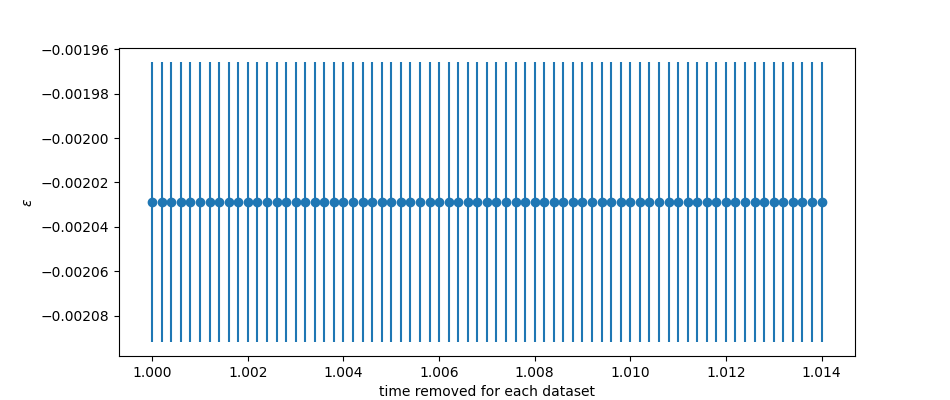

[Text(0, 0.5, '$\\epsilon$'), Text(0.5, 0, 'time removed for each dataset')]

In [60]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(5000,5071)/5000, charge_mean, yerr=charge_std/np.sqrt(100),fmt='o', label='')
# ax.plot(np.arange(5000,5071)/5000, np.arange(5000,5071)*0, 'r--')
ax.set(xlabel='time removed for each dataset', ylabel=r'$\epsilon$')
# ax.legend()

In [55]:
charge_mean2 = [np.mean(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]
charge_std2 = [np.std(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]

<IPython.core.display.Javascript object>


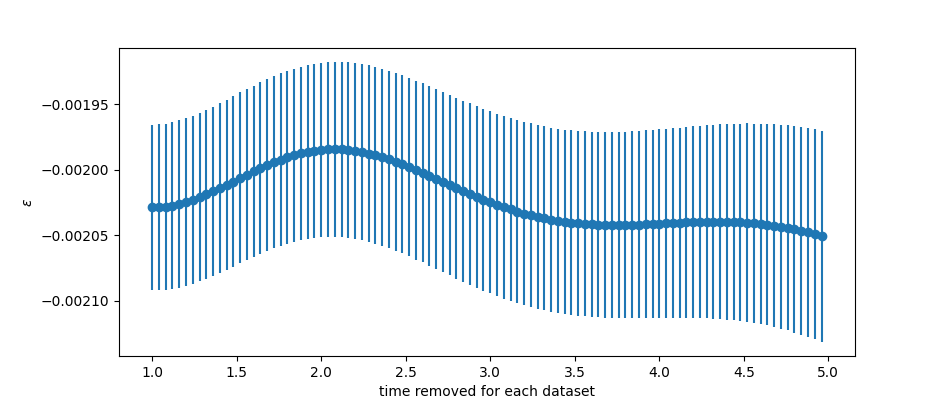

[Text(0, 0.5, '$\\epsilon$'), Text(0.5, 0, 'time removed for each dataset')]

In [61]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(5000, 25000, 200)/5000, charge_mean2, yerr=charge_std2/np.sqrt(100),fmt='o', label='')
# ax.plot(np.arange(5000, 25000, 200)/5000, np.arange(5000, 25000, 200)*0, 'r--')
ax.set(xlabel='time removed for each dataset', ylabel=r'$\epsilon$')
# ax.legend()

In [69]:
charge_mean3 = [np.mean(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]
charge_std3 = [np.std(mm_gg2[j*100:(j+1)*100])/20/scaleX for j in range(100)]

<IPython.core.display.Javascript object>


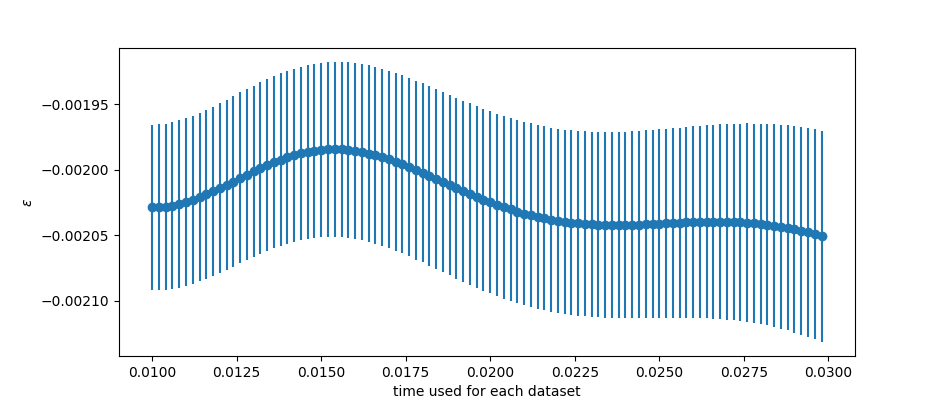

[Text(0, 0.5, '$\\epsilon$'), Text(0.5, 0, 'time used for each dataset')]

In [70]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(50, 150)/5000, charge_mean3, yerr=charge_std3/np.sqrt(100),fmt='o', label='')
# ax.plot(np.arange(5000, 25000, 200)/5000, np.arange(5000, 25000, 200)*0, 'r--')
ax.set(xlabel='time used for each dataset', ylabel=r'$\epsilon$')
# ax.legend()

In [307]:
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin_1sec/Discharge_1.h5'
bb = BeadDataFile.BeadDataFile(fname=fname)

<IPython.core.display.Javascript object>


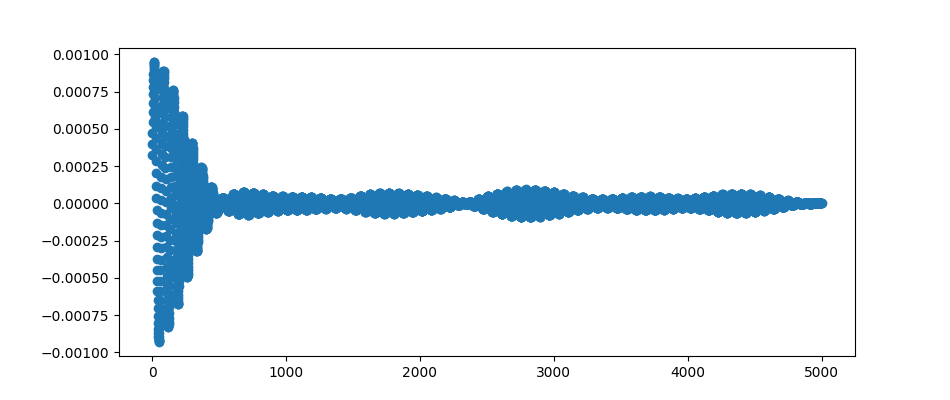

In [309]:
xx = bb.response_at_freq2('x', drive_freq=71, bandwidth=10)
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(5000), xx)

In [19]:
fname = r'/home/data_transfer/data_from_windows/Testdata/20200805/Discharge_4.h5'
# fname = r'/home/data_transfer/data_from_windows/20200809/Bead1/InitialTest/Data28.h5'
bb = BeadDataFile.BeadDataFile(fname)

In [ ]:
bb.

<IPython.core.display.Javascript object>


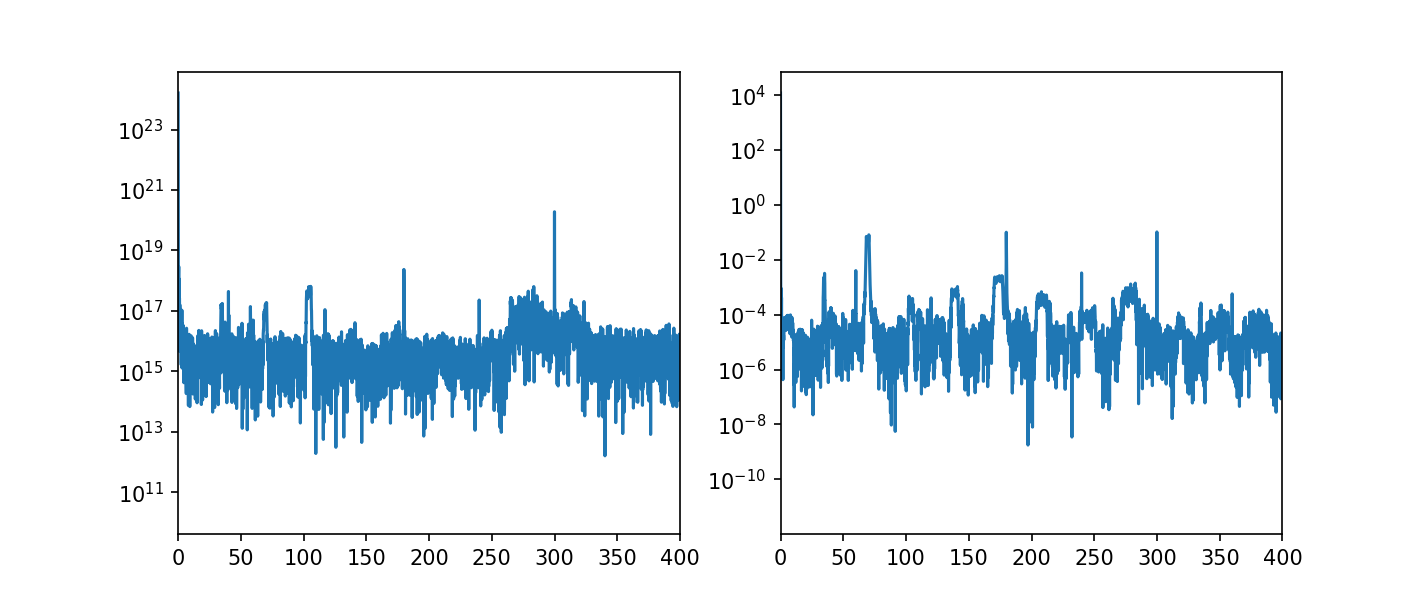

[[(0.0, 400.0)], [(0.0, 400.0)]]

In [46]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(*bb.psd('x'))
ax[1].semilogy(*bb.psd2('x'))
[a.set(xlim=(0,400)) for a in ax]

In [12]:
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data'])

In [13]:
sync = pos_data.reshape(-1,11).T[5]

In [15]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.plot(range(500), sync[:500]/100)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
zfb = bb.feedback[2][239:]

In [18]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.plot(range(40000), zfb[:40000], label='z_fb')
ax.plot(range(50000), (bb.Iz+120000)/12, label='Iz')
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …